### Student Information
Name:

Student ID:

GitHub ID:

Kaggle name:

Kaggle private scoreboard snapshot:

[Snapshot](img/pic0.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the [DM2022-Lab2-master Repo](https://github.com/keziatamus/DM2022-Lab2-Master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/competitions/dm2022-isa5810-lab2-homework) regarding Emotion Recognition on Twitter by this link https://www.kaggle.com/t/2b0d14a829f340bc88d2660dc602d4bd. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (60-x)/6 + 20 points, where x is your ranking in the leaderboard (ie. If you rank 3rd your score will be (60-3)/6 + 20 = 29.5% out of 30%)   
    Submit your last submission __BEFORE the deadline (Nov. 22th 11:59 pm, Tuesday)__. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 25th 11:59 pm, Friday)__. 

In [37]:
### Begin Assignment Here
import pandas as pd

## load pickle files
train_df = pd.read_pickle("data/train_df.pkl")
test_df = pd.read_pickle("data/test_df.pkl")

---
### ** >>> Exercise 1 (Take home): **
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


<BarContainer object of 30 artists>

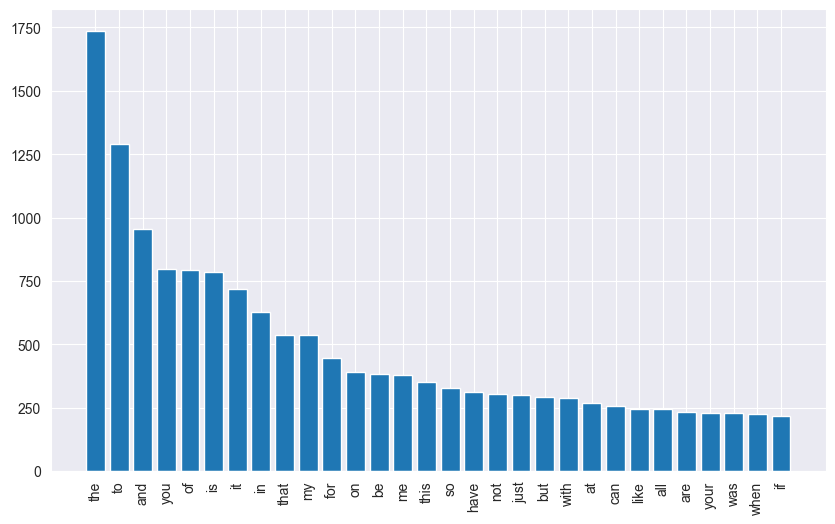

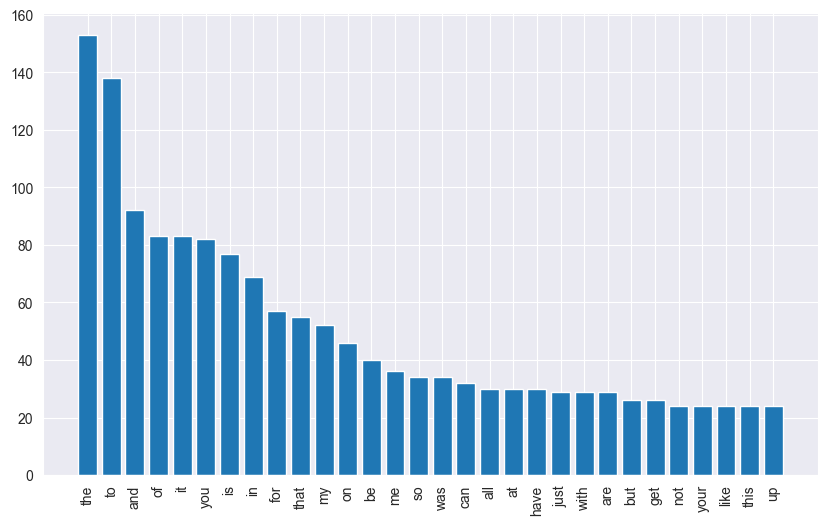

In [38]:
# Answer here
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
count_vect = CountVectorizer()
train_counts = count_vect.fit_transform(train_df.text) # learn the vocabulary and return document-term matrix
train_counts = np.asarray(train_counts.sum(axis=0)).flatten() # count term frequency
train_ind = np.argsort(train_counts)[::-1][:30] # get sorted index
fig1 = plt.figure(figsize=(10, 6))
plt.xticks(rotation='vertical')
plt.bar(x=count_vect.get_feature_names_out()[train_ind], height=train_counts[train_ind])

test_counts = count_vect.transform(test_df.text)  #learn the vocabulary and return document-term matrix
test_counts = np.asarray(test_counts.sum(axis=0)).flatten() # count term frequency
test_ind = np.argsort(test_counts)[::-1][:30] # get sorted index
fig2 = plt.figure(figsize=(10, 6))
plt.xticks(rotation='vertical')
plt.bar(x=count_vect.get_feature_names_out()[test_ind], height=test_counts[test_ind])


---
### ** >>> Exercise 2 (Take home): **
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [39]:
# Answer here
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk

tfidf_vect = TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize) # use TFIDF vectorizer
train_tfidf = tfidf_vect.fit_transform(train_df['text']) # learn the vocabulary and return tf-idf

tfidf_feature_names = tfidf_vect.get_feature_names_out() # get feature names
tfidf_feature_names[100:110] # show feature names

array(['awful', 'b', 'baby', 'back', 'bad', 'ball', 'balls', 'bb18', 'bc',
       'bday'], dtype=object)

---
### ** >>> Exercise 3 (Take home): **
Can you interpret the results above? What do they mean?

In [40]:
# Answer here


---
### ** >>> Exercise 4 (Take home): **
Build a model using a ```Naive Bayes``` model and train it. What are the testing results?

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [41]:
# Answer here


---
### ** >>> Exercise 5 (Take home): **

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

In [42]:
# Answer here


---
### ** >>> Exercise 6 (Take home): **

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below (Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?
<table><tr>
    <td><img src="pics/pic3.png" style="width: 300px;"/> </td>
    <td><img src="pics/pic4.png" style="width: 300px;"/> </td>
</tr></table>

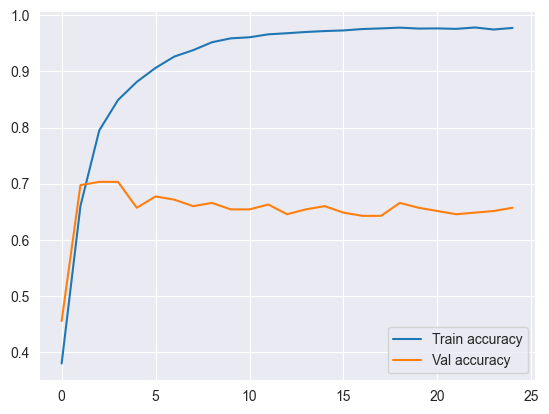

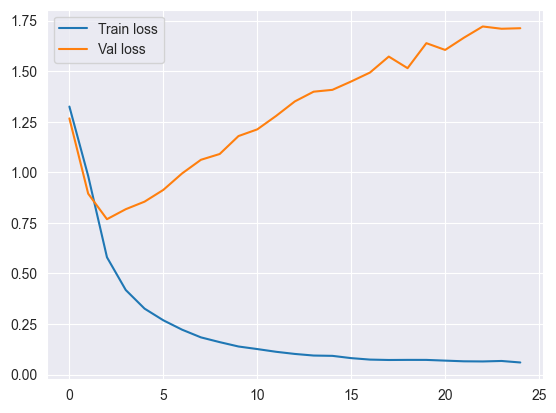

In [43]:
# Answer here
training_log = pd.read_csv("logs/training_log.csv")

plt.figure()
plt.plot(training_log.epoch, training_log.accuracy)
plt.plot(training_log.epoch, training_log.val_accuracy)
plt.legend(["Train accuracy", "Val accuracy"])


plt.figure()
plt.plot(training_log.epoch, training_log.loss)
plt.plot(training_log.epoch, training_log.val_loss)
plt.legend(["Train loss", "Val loss"])

---
### ** >>> Exercise 7 (Take home): **

Now, we have the word vectors, but our input data is a sequence of words (or say sentence).
How can we utilize these "word" vectors to represent the sentence data and train our model?


In [44]:
# Answer here


---
### ** >>> Exercise 8 (Take home): **

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).


In [45]:
# Answer here
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "GoogleNews/GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)

FileNotFoundError: [Errno 2] No such file or directory: 'GoogleNews/GoogleNews-vectors-negative300.bin.gz'